In [1]:
import numpy as np     #只需要下载numpy库即可
import random
import GridWorld_v2

In [2]:
gamma = 0.9   #折扣因子，越接近0越近视

rows = 5      #记得行数和列数这里要同步改
columns = 5

# gridworld = GridWorld_v2.GridWorld_v2(rows=rows, columns=columns, forbiddenAreaNums=8, targetNums=2, seed = 52,forbiddenAreaScore=-10)
# gridworld = GridWorld_v2.GridWorld_v2(desc = [".#",".T"])             #赵老师4-1的例子
# gridworld = GridWorld_v2.GridWorld_v2(desc = ["##.T","...#","...."])  #随便弄的例子
gridworld = GridWorld_v2.GridWorld_v2(forbiddenAreaScore=-10, score=1,desc = [".....",".##..","..#..",".#T#.",".#..."]) 
#gridworld = GridWorld_v2(forbiddenAreaScore=-10, score=1,desc = ["T."]) 
gridworld.show()


value = np.zeros(rows*columns)       #初始化可以任意，也可以全0
qtable = np.zeros((rows*columns,5))  #初始化，这里主要是初始化维数，里面的内容会被覆盖所以无所谓

# np.random.seed(50)
policy = np.eye(5)[np.random.randint(0,5,size=(rows*columns))] 
gridworld.showPolicy(policy)

⬜️⬜️⬜️⬜️⬜️
⬜️🚫🚫⬜️⬜️
⬜️⬜️🚫⬜️⬜️
⬜️🚫✅🚫⬜️
⬜️🚫⬜️⬜️⬜️
🔄⬅️⬇️⬇️⬆️
➡️⏩️⏩️⬆️➡️
🔄⬆️⏩️⬇️🔄
🔄🔄✅⏬🔄
➡️⏬⬆️⬅️⬇️


In [3]:
epsilon = 0.99
p1 = 1-epsilon * (4/5)
p2 = epsilon/5
d = {1:p1, 0:p2}
a2 = np.vectorize(d.get)(policy)

In [4]:
from IPython.display import clear_output
clear_output(wait=True)

In [9]:
#通过采样的方法计算action value，model free的话意味着不知道整个gridworld的概率了，所以不能直接套贝尔曼方程迭代求解
policy = np.eye(5)[np.random.randint(0,5,size=(rows*columns))] 
gridworld.show()
gridworld.showPolicy(policy)
print("random policy")


trajectorySteps = 20000
learning_rate = 0.01
epsilon = 1
# qtable = np.zeros((rows*columns,5))    #生成Qtable，也就是action-value-table
state_value = np.zeros((rows * columns))

num_episodes = 6000
for episode in range(num_episodes):
    # 
    if(epsilon > 0.001) :
        epsilon -= 0.001
    else:
        epsilon = 0.001
        
    p1 = 1-epsilon * (4/5)
    p0 = epsilon/5
    # trajectorySteps = int(20+epsilon*1000)
    print("trajectorySteps",trajectorySteps)
    print(f"epision:{epsilon}, p1:{p1}, p0:{p0}")
    
    d = {1:p1, 0:p0}
    policy_epsilon = np.vectorize(d.get)(policy)
    
    i = random.randint(0,24)  #初始状态
    j = random.randint(0,4)
    
    cnt = [0 for i in range(25)]
    
    Trajectory = gridworld.getTrajectoryScore(nowState=i, action=j, policy=policy_epsilon, steps=trajectorySteps, stop_when_reach_target=False)
    # if(len(Trajectory)>5000):
    #     continue
    clear_output(wait=True)
    # 注意这里的返回值是大小为(trajectorySteps+1)的元组列表，因为把第一个动作也加入进去了
    steps = len(Trajectory) - 1
    for k in range(steps,-1,-1):
        tmpstate, tmpaction, tmpscore, nextState, nextAction  = Trajectory[k]
        cnt[tmpstate] += 1
        TD_error = state_value[tmpstate] - (tmpscore + gamma * state_value[nextState])
        state_value[tmpstate] = state_value[tmpstate] - learning_rate * TD_error
        
    print(np.array(cnt).reshape(5,5))
    for i in range(rows * columns):
        for j in range(5):
            score,nextState = gridworld.getScore(i,j) 
            qtable[i][j] = score + gamma * value[nextState]
    
    print(state_value.reshape(5,5))
    gridworld.showPolicy(policy)
    print(np.array(state_value).mean())
    
    
    policy = np.eye(5)[np.argmax(qtable,axis=1)]  #qtable的最优值作为更新策略，并用独热码来表示
    policy_epsilon = np.vectorize(d.get)(policy)

    break
    # print(np.array(cnt).reshape(5,5))


    


    

[[772 815 797 791 853]
 [820 796 708 746 830]
 [800 868 795 753 812]
 [834 826 794 753 832]
 [793 848 844 762 759]]
[[ -8.74387452 -13.11109709 -12.83257726  -6.52333652  -4.17916907]
 [-12.90248798 -17.43554161 -19.45556792 -11.75041921  -5.55968301]
 [-12.25564467 -21.34207689 -18.92432367 -15.30951795  -7.34541814]
 [-14.33239573 -19.40868338 -20.05573878 -13.37984416  -9.14529195]
 [-15.82398342 -18.94862052 -15.75685571 -11.78628044  -6.97189568]]
➡️⬇️⬅️⬅️⬆️
➡️⏫️⏩️⬇️➡️
⬆️🔄🔄⬅️🔄
⬆️⏪✅⏩️⬆️
➡️⏩️➡️⬇️⬇️
-13.331213009326047


In [46]:
policy

array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]])

In [52]:
policy = 0.2 * np.ones((rows*columns,5))
episodes = [gridworld.getTrajectoryScore(nowState = random.randint(0,24),action = random.randint(0,4),policy = policy,steps = 500) 
            for i in range(500)]

In [83]:
state_value = np.random.randn(25)
learning_rate = 0.0001
for i in range(500):
    for trajectory in episodes[i]:
        tmpstate, tmpaction, tmpscore, nextState, nextAction = trajectory
        TD_error = state_value[tmpstate] - (tmpscore + gamma * state_value[nextState])
        state_value[tmpstate] = state_value[tmpstate] - learning_rate * TD_error

In [84]:
state_value = np.round(state_value,decimals=3).reshape(5,5)

In [85]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

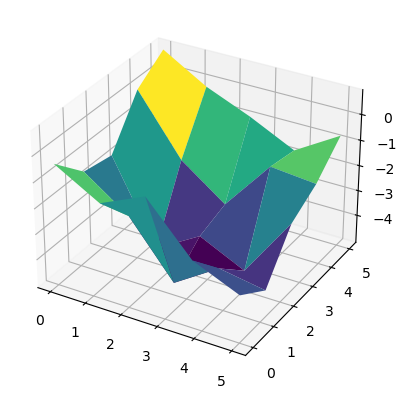

In [86]:
x = np.linspace(0,5,5)
y = np.linspace(0,5,5)

X, Y = np.meshgrid(x,y)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(Y,X,state_value, cmap='viridis')

In [87]:
state_value

array([[-0.375, -1.536, -1.748,  0.029,  0.831],
       [-1.366, -2.764, -4.988, -2.3  , -0.194],
       [-0.591, -4.886, -3.955, -3.582, -0.922],
       [-2.482, -3.748, -4.805, -1.571, -1.78 ],
       [-3.251, -4.049, -2.392, -1.746, -0.719]])